# Read in Arctic Communites Data

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt


In [2]:
df = gpd.read_file('data/arctic_communities.geojson')

## Brainstorm

Individually, write down high-level steps on how you would explore and wrangle the data to produce the updated map. Do not code anything yet.

- find crs to center around poles


Discuss your high-level steps with your team. What do you see as potential challenges to implementing your plan?
- data types, why does it have to be data types

In [3]:
df.geom_type

0     MultiPolygon
1     MultiPolygon
2     MultiPolygon
3     MultiPolygon
4     MultiPolygon
5     MultiPolygon
6          Polygon
7          Polygon
8     MultiPolygon
9     MultiPolygon
10    MultiPolygon
11    MultiPolygon
12    MultiPolygon
13    MultiPolygon
14         Polygon
dtype: object

### The output of geom_type
Mainly MultiPolygons and a few Polygons
#Create an if-else statement that:
#prints “Multiple feature types:” followed by the unique geometry types (no repetition) 
in the geodataframe if not all the features are polygons, and

#prints “All features are:” followed by the unique geometry type 
if all the features in the geodataframe have the same geometry type.

In [4]:
def check_polygons(df):
    if len(df.geom_type.unique()) > 1 :
        print (f"Multiple feature types:", df.geom_type.unique())
    else: 
        print(f"All features are:", df.geom_type.unique()[0])


## 3. Explode Polygons

In [5]:
 
#Overwrite the df geodataframe with the output from the explode method with the index_parts parameter set to False.
df = df.explode(index_parts = False)

# Reset index of df
df = df.reset_index(drop = True)

# Check with function to see if it worked
check_polygons(df)

All features are: Polygon


/opt/python/3.7.13/lib/python3.7/site-packages/geopandas/geoseries.py:924: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if s.type.startswith("Multi") or s.type == "GeometryCollection":


The explode function changes all the single multi-polygons to polygons

## 4. Compute minimum y-coordinate for polygons

In [6]:
# Select the first row of df using iloc. What kind of Python object is this = Pandas Series
row1 = df.iloc[0]
type(row1)

pandas.core.series.Series

In [7]:
# Select the geometry of the first row of df. What kind of Python object is this = Polygon

In [8]:
rowgeo = df.iloc[0].geometry
type(rowgeo)

shapely.geometry.polygon.Polygon

In [9]:
#Use the bounds attribute for shapely Polygons to select the southern-most bound of the first polygon in df.

In [10]:
south_bound = rowgeo.bounds[1]
south_bound

56.511035156249996

In [11]:
# Create a function min_y that receives a single row of a geodataframe as its parameter 
#and returns the minimum y-coordinate of its bounding box.

In [12]:
def min_y(row):
    return row.geometry.bounds[1]

In [13]:
# Use the min_y function and the apply method for data frames to 
# create a new column miny in df which has the minimum y coordinate.

df['min_y'] = df.apply(min_y, axis=1)

# 5. Filter, update CRS, and reproduce map

In [14]:
#Select the polygons with a bounding box at or above 40 degrees of latitude into a new variable named arctic.

arctic = df[df['min_y'] >= 40]

In [17]:
# Change CRS to focus around Arctic
arctic = arctic.to_crs('epsg:3413')

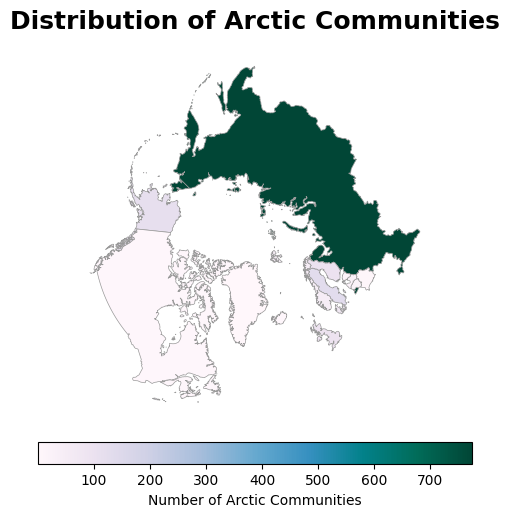

In [18]:
fig, ax = plt.subplots(figsize=(8, 6))

# Remove the axis for a cleaner map
ax.axis('off')

# Create choropleth map of communities
# Plot with refined color and edge style
arctic.plot(
    ax=ax,
    column='n_communities',
    cmap='PuBuGn',
    legend=True,
    edgecolor="0.6",
    linewidth=0.5,
    legend_kwds={
        "shrink": 0.7,
        "label": "Number of Arctic Communities",
        "orientation": "horizontal",
        "pad": 0.05
    }
)

# Add title and subtitle for better context
ax.set_title('Distribution of Arctic Communities', fontsize=18, weight='bold', pad=15)

plt.show()